# Heat map

Heatmap is a 2D Histogram

* plotting 2 discrete variable
* when extremely large data points are plotted 
* Bin sizes are important 

Usage:

* cmin - All bins that has count less than cmin will not be displayed (set to NaN before passing to imshow) and these count values in the return value count histogram will also be set to nan upon return.

* cmax - All bins that has count more than cmax will not be displayed
* cmap='viridis_r'; Here **r** means reverse the colormap
* bin -> bin edges for x and y variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

In [2]:
fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(4)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


Text(0, 0.5, 'Combined fuel efficiency')

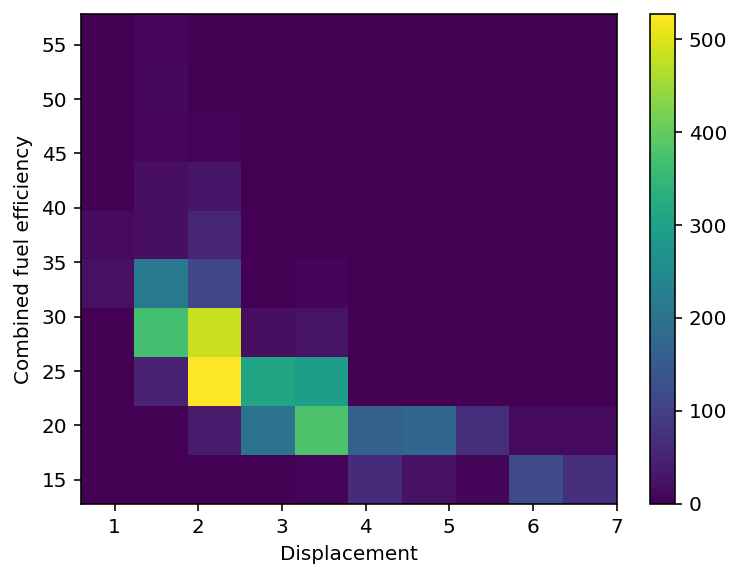

In [3]:
plt.hist2d(data=fuel_econ, x='displ', y='comb');
plt.colorbar(); # To show legend
plt.xlabel('Displacement')
plt.ylabel('Combined fuel efficiency')

Text(0, 0.5, 'Combined fuel efficiency')

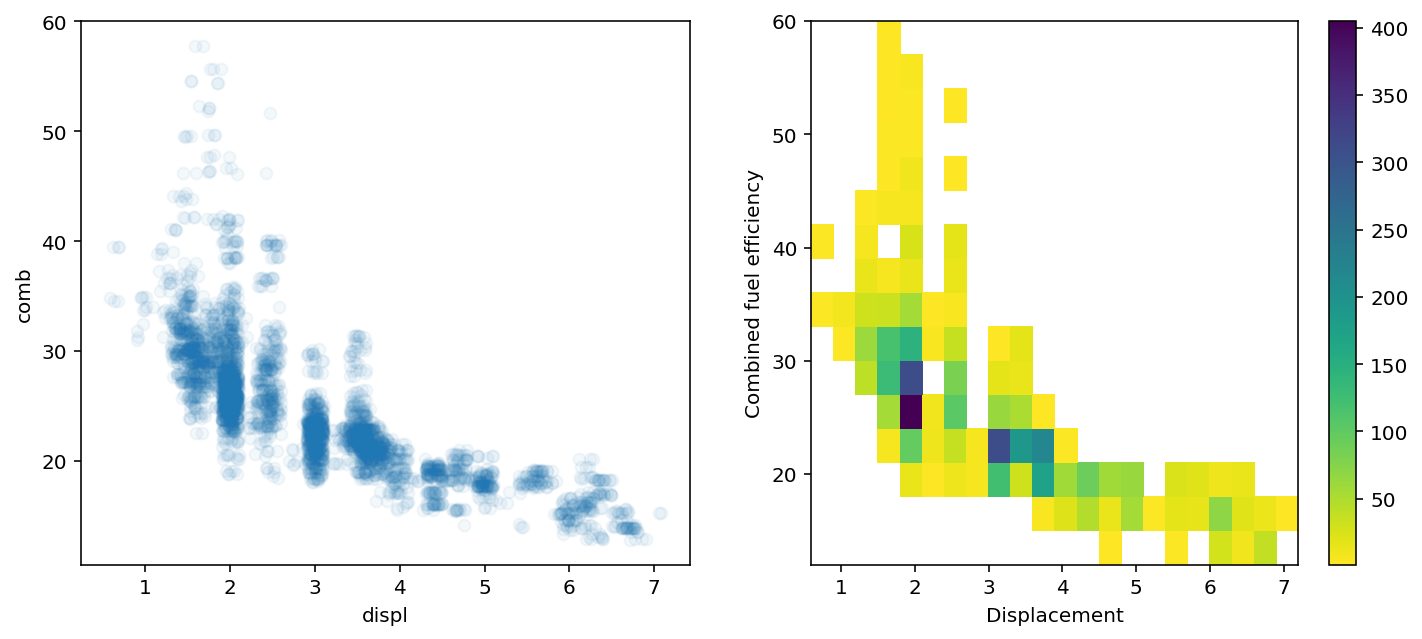

In [22]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False,
            x_jitter = 0.1, scatter_kws = {'alpha' : 1/20})

# Heatmap
plt.subplot(1, 2, 2)
bins_x = np.arange(0.6 , 7+0.3, 0.3)
bins_y = np.arange(12 , 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
           cmap='viridis_r', bins = [bins_x, bins_y]);

plt.colorbar(); # To show legend
plt.xlabel('Displacement')
plt.ylabel('Combined fuel efficiency')

In [6]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


## Plot counts on top of heatmap

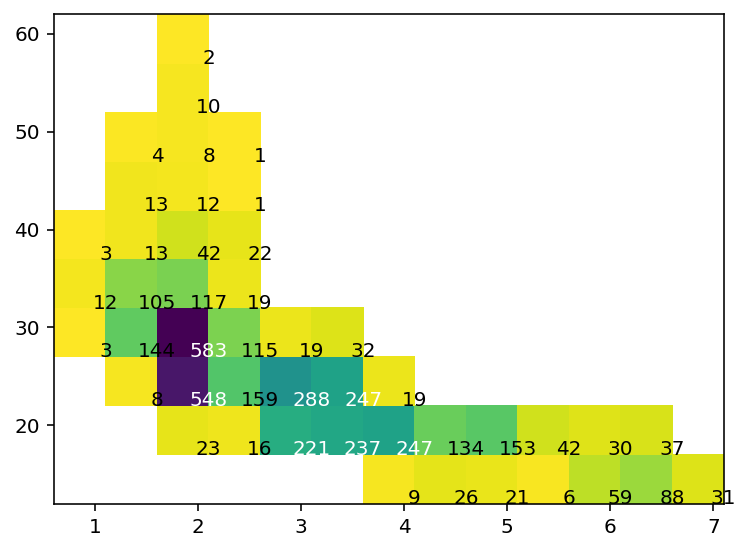

In [40]:
bins_x = np.arange(0.6 , 7+0.5, 0.5)
bins_y = np.arange(12 , 58+5, 5)

h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
           cmap='viridis_r', bins = [bins_x, bins_y]);

# Get counts from hist2d output
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 200: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0.5:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')